<a href="https://colab.research.google.com/github/VelagaJaswanth321/finalsubjaswanth/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()


Saving Medical Price Dataset.csv to Medical Price Dataset.csv


In [2]:
import pandas as pd
md=pd.read_csv("Medical Price Dataset.csv")
md.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
md.shape

(1338, 7)

In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
md.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
md.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
md.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


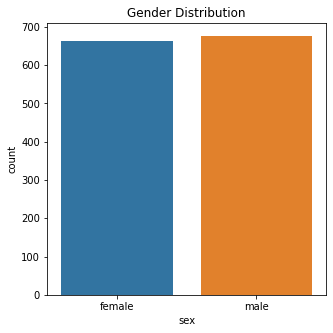

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=md)
plt.title('Gender Distribution')
plt.show()

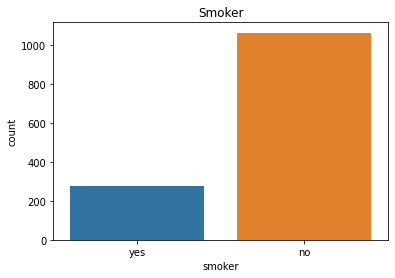

In [11]:
sns.countplot(x='smoker',data=md)
plt.title('Smoker')
plt.show()

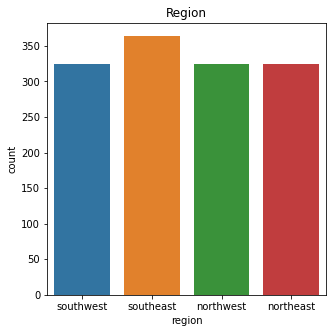

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=md)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'cost vs Region')

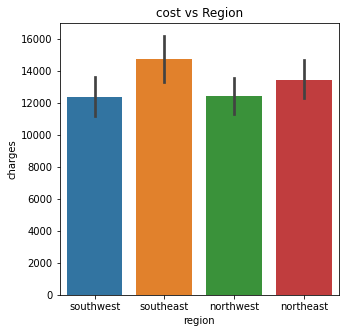

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=md)
plt.title('cost vs Region')

Text(0.5, 1.0, 'charges for smoker')

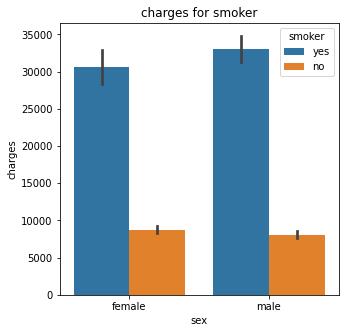

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=md)
plt.title('charges for smoker')

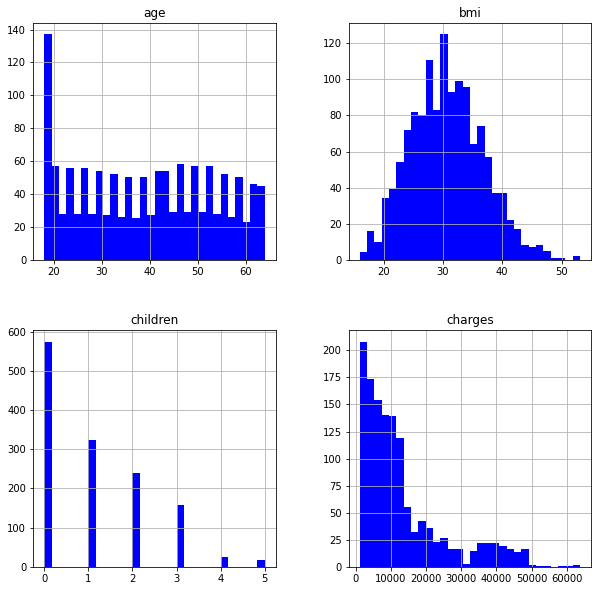

In [19]:
md[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='blue')
plt.show()

In [20]:
md['sex']=md['sex'].apply({'male':0,'female':1}.get)
md['smoker']=md['smoker'].apply({'yes':1,'no':0}.get)
md['region']=md['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [21]:
md.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


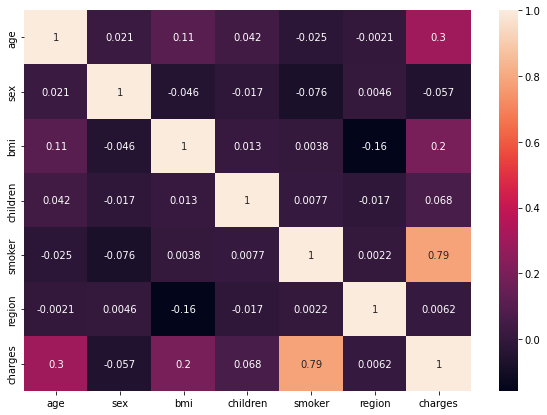

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(md.corr(),annot=True)
plt.show()

In [26]:
X=md.drop(['charges','sex'],axis=1)
y=md.charges

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)

(936, 5)


In [28]:
linreg=LinearRegression()

In [29]:
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
print("r2 score",(r2_score(y_test,pred)))

r2 score 0.7697211527941854


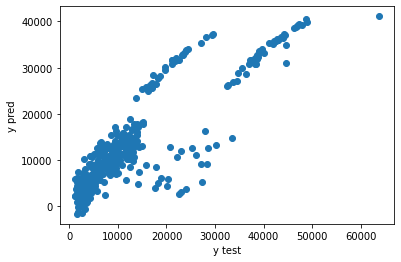

In [35]:
plt.scatter(y_test,pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.show()

In [36]:
data={'age':50,'bmi':20,'children':2,'smoker':0,'region':12}
index=[0]
cust_md=pd.DataFrame(data,index)
cust_md

,age,bmi,children,smoker,region
0,50,20,2,0,12


In [37]:
cost_pred=linreg.predict(cust_md)
print("The medical insuraance cost ",cost_pred)

The medical insuraance cost  [11140.15026941]
